In [42]:
import pandas as pd
import numpy as np
import datetime
import matplotlib    
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_excel('sku.xlsx')
data2=data.copy()
data2=data2.drop("SKU", axis=1)

#Changing datetime to Year-Month through mapping
mapper = lambda x: x.strftime("%Y-%m")
data2.columns=data2.columns.map(mapper)

# 1) What is the monthly & quaterly sales data by SKU?

In [28]:
# Month wise sales
x=data2.groupby(by=data2.columns,axis=1).sum()
x.head()

,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
0,41702,36880,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826
1,69451,62415,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062
2,27412,31687,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153
3,46443,41922,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253
4,10720,10306,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182


In [29]:
# Quarter wise sales
y=x.groupby(pd.PeriodIndex(x.columns, freq='Q'), axis=1).mean()
y.head()

,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3
0,39291.0,25434.000000,25326.333333,43963.333333,55826.0
1,65933.0,80742.333333,83415.666667,137923.666667,196062.0
2,29549.5,31834.333333,32842.000000,23825.666667,26153.0
3,44182.5,57681.666667,69564.666667,59513.666667,54253.0
4,10513.0,12969.333333,11364.666667,10341.333333,10182.0


In [30]:
# Monthly average by SKU

x.insert(0, "SKU", data['SKU'])
x['Total_sales'] = data2.sum(axis=1)
x["Monthly_average"]=x['Total_sales']/12
x.head()

,SKU,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,Total_sales,Monthly_average
0,2527,41702,36880,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826,418579,34881.583333
1,3042,69451,62415,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062,1234173,102847.750000
2,3086,27412,31687,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153,350758,29229.833333
3,3155,46443,41922,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253,702898,58574.833333
4,3166,10720,10306,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182,135234,11269.500000


# 2) Which are the top 3 months in terms of overall sales?

In [38]:
data3=data2.groupby(by=data2.columns,axis=1).sum()
total_sales_per_month=data3.sum(axis=0)

In [40]:
total_sales_per_month.sort_values(ascending=False)

2020-03    20234570
2019-12    19536270
2020-01    19170099
2020-04    19103472
2020-07    18795771
2020-05    18555947
2020-06    18303531
2019-10    18300108
2020-02    17973457
2019-11    17954015
2019-09    17309331
2019-08    16590204
dtype: int64

# The top 3 months are:
1.MARCH 2020


2.DECEMBER 2019


3.JANUARY 2019

# 3) Which SKUs are outliers in terms sales in any month?

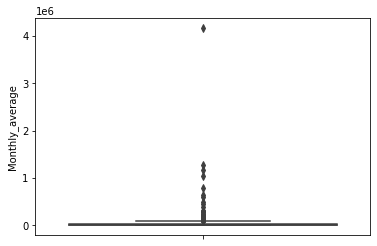

In [48]:
sns.boxplot(y=x['Monthly_average'])

In [44]:
x['Monthly_average'].describe()

count    2.470000e+02
mean     7.484034e+04
std      3.067301e+05
min      3.050000e+01
25%      6.972917e+02
50%      3.406417e+03
75%      3.929754e+04
max      4.175261e+06
Name: Monthly_average, dtype: float64